In [1]:
from ROOT import TGraph, TCanvas
import numpy as np

Welcome to JupyROOT 6.08/00


In [2]:
class TopMassFitter(object):
    
    def __init__(self):
        pass

    def hard_coded_init(self):      
        self.sqrts = [350, 352, 355]
        self.luminosity = [100, 100, 100]
        self.cross_section_rec = []
        self.cross_section_rec_error = []
        
        self.m_top_true = 173.
        
        self.cross_section_true_list = [
            (3.470000000000E+02,  1.008602903082E+02),
            (3.498750000000E+02,  2.367545857837E+02),
            (3.527500000000E+02,  3.122649468990E+02),
            (3.556250000000E+02,  3.671992199176E+02),
            (3.585000000000E+02,  4.104402307102E+02),
            (3.613750000000E+02,  4.458379375163E+02),
            (3.642500000000E+02,  4.752692084437E+02),
            (3.671250000000E+02,  5.001898819994E+02),
            (3.700000000000E+02,  5.213290208290E+02),
            ]
        
        self.cross_section_true = TGraph()
        self.masses = []
        self.cross_section_shapes = [] #list of tgraph
        self.chi2_scan = []
        
        self.chi2_scan_graph = TGraph()
        self.chi2_scan_graph.SetNameTitle("g_chi2_scan", "g_chi2_scan")
        
        for i, (sqrts, cs) in enumerate(self.cross_section_true_list):
            self.cross_section_true.SetPoint(i, sqrts, cs)
            
        for sqrts, luminosity in zip(self.sqrts, self.luminosity):
            aux_cs = float(self.cross_section_true.Eval(sqrts))
            self.cross_section_rec.append(aux_cs)
            aux_cs_error = np.sqrt(float(aux_cs) / luminosity)
            self.cross_section_rec_error.append(aux_cs_error)
            print aux_cs, aux_cs_error
        

        
        self.masses = [170, 173, 176]
        self.cross_section_shapes.append(TGraph())
        self.cross_section_shapes.append(TGraph())
        self.cross_section_shapes.append(TGraph())
        
        for i, (sqrts, cs) in enumerate(self.cross_section_true_list):
            self.cross_section_shapes[0].SetPoint(i, sqrts, 0.992*cs)
            self.cross_section_shapes[1].SetPoint(i, sqrts, cs)
            self.cross_section_shapes[2].SetPoint(i, sqrts, 1.003*cs)
            
    def load_config(self):
        pass
        # config_file = open(config_filename, "r")
    
    def compute_chi2(self):
        for i, (mass, cross_section_shape) in enumerate(zip(self.masses, self.cross_section_shapes)):
            aux_chi2 = 0.
            for (sqrts, cross_section, cross_section_error) in zip(self.sqrts, self.cross_section_rec, self.cross_section_rec_error):
                aux_chi2 += ((cross_section - cross_section_shape.Eval(sqrts))/cross_section_error)**2
            self.chi2_scan.append(aux_chi2)
            print aux_chi2
        
            self.chi2_scan_graph.SetPoint(i, mass, aux_chi2)
            
            
        self.chi2_scan_graph.canvas = TCanvas("c_chi2_scan_graph", "c_chi2_scan_graph", 800, 600)
        self.chi2_scan_graph.canvas.cd()        
        self.chi2_scan_graph.Fit("pol2")
        self.fit_pol2 = self.chi2_scan_graph.GetFunction("pol2")
        self.chi2_scan_graph.Draw("ALP")
        self.chi2_scan_graph.canvas.Draw()
    
    def print_result(self):
        mass = (-0.5) * self.fit_pol2.GetParameter(1) / self.fit_pol2.GetParameter(2)
        err_mass = 1. / np.sqrt(self.fit_pol2.GetParameter(2))
        print "result: m = {} +/- {}".format(mass, err_mass)

In [3]:
my_fit = TopMassFitter()

In [4]:
my_fit.hard_coded_init()

240.037644963 1.54931483231
292.566591825 1.71045780955
355.256986653 1.88482621653


5.68231183002
0.0
0.799075101097

****************************************
Minimizer is Linear
Chi2                      =   5.4626e-16
NDf                       =            0
p0                        =      10917.5   +/-   4072.21     
p1                        =     -125.401   +/-   47.0852     
p2                        =     0.360077   +/-   0.136083    


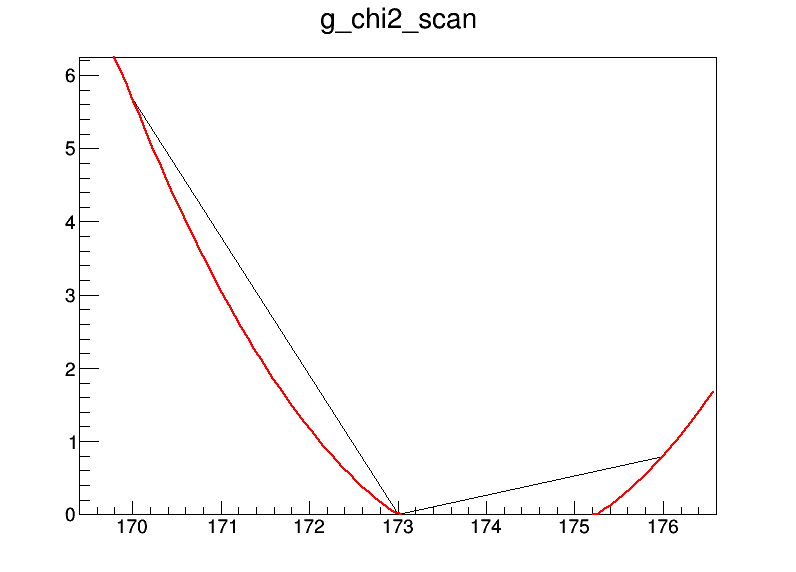

In [5]:
my_fit.compute_chi2()

In [6]:
my_fit.print_result()

result: m = 174.130136976 +/- 1.66648832745
